In [23]:
"""
Download data as a pandas DataFrame object
"""
import pandas as pd

data = pd.read_csv("iris.csv")
encodings = {
    "Setosa": 1,
    "Versicolor": 2,
    "Virginica": 3
}
data["class_label"] = [encodings[x] for x in data["species"]]
data.head()

,sepal.length,sepal.width,petal.length,petal.width,species,class_label
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1


In [24]:
"""
Specifying input vectors (X) and prediction target (y)
"""
# Specifying the prediction target
target = ["class_label"]
y = data[target]
print(y.head())

# Specifying X
attrs = ["sepal.length", "sepal.width", "petal.length", "petal.width"]
X = data[attrs]
print(X.head())

   class_label
0            1
1            1
2            1
3            1
4            1
   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [25]:
"""
Using a scikit-learn MLP classifier to fit the data and make predictions
"""
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Splitting data into train and test sets for cross validation as discussed in class
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Specifying the model (from sklearn docs)
model = MLPClassifier(hidden_layer_sizes=(100, ))

# Fitting the model to the data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred.shape

/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(38,)

MAE 0.10526315789473684


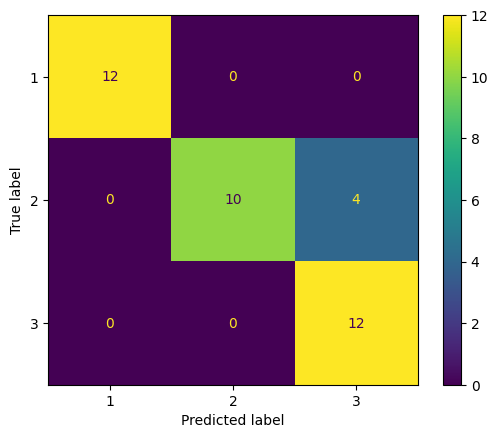

In [26]:
"""
Analyzing the results using loss function
"""
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Computing loss
error = mean_absolute_error(y_test, y_pred)
print("MAE", error)

# Plotting the confusion matrix for the MLPClassifier
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

""" 
MLP Exploring different activation functions
"""
# Defining a class to use different activation functions with the MLPClassifier
class IrisMLPTrainer:
    """
    Packages the training of iris classification using different activations
    """
    def __init__(self, data, activation, batch_size=30, learning_rate="constant", purturbed=False):
        # Specifying the prediction target
        target = ["class_label"]
        self.y = data[target]

        # Specifying X
        attrs = ["sepal.length", "sepal.width", "petal.length", "petal.width"]
        self.X = data[attrs]

        # Splitting data into train and test sets for cross validation as discussed in class
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y)

        # Creating purturbations in X
        if purturbed:
            self.X_purturbed = self.X_train.copy()
            for i, row in self.X_purturbed.iterrows():
                self.X_purturbed.loc[i] = row - np.random.randint(low=0, high=30, size=row.shape)

        # Specifying the model (from sklearn docs)
        self.model = MLPClassifier(hidden_layer_sizes=(50, 50, 50), 
                                   activation=activation, 
                                   learning_rate=learning_rate,
                                   batch_size=batch_size,
                                   learning_rate_init=3)

        # Fitting the model to the data
        if not purturbed:
            self.model.fit(self.X_train, self.y_train)
        else:
            self.model.fit(self.X_purturbed, self.y_train)

        # Making predictions on the test set
        self.y_pred = self.model.predict(self.X_test)

    def preds(self):
        return self.y_pred
    
    # Uses MAE for accuracy
    def accuracy(self):
        return mean_absolute_error(self.y_test, self.y_pred)
    
class ErrorTable:
    def __init__(self, trainers, trainer_names):
        ## Extracting errors
        errors = [trainer.accuracy() for trainer in trainers]

        # Creating the table with variable names as a column
        self.table = pd.DataFrame({
            "Trainer Variable Name": trainer_names,
            "Error (MAE)": errors
        })


/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.p

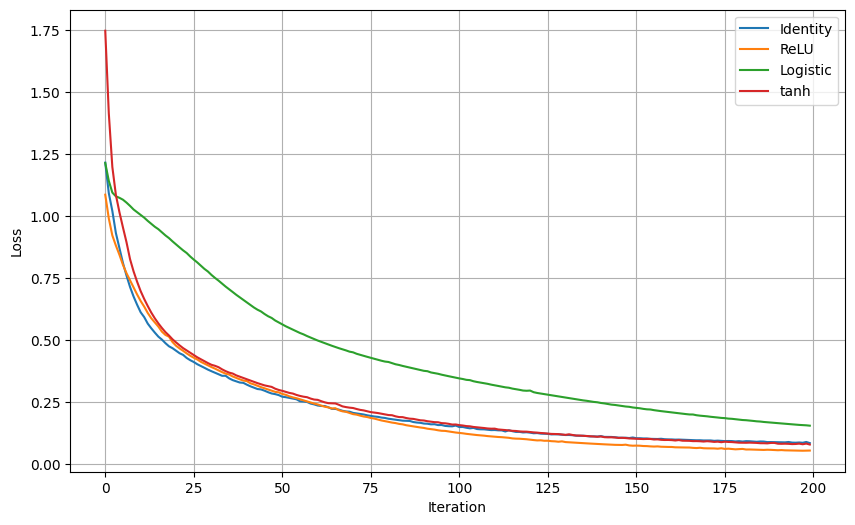

,Trainer Variable Name,Error (MAE)
0,Identity,0.000000
1,ReLU,0.078947
2,Logistic,0.052632
3,tanh,0.026316


In [44]:
"""
Evaluating the effect of different activation functions on MLP performance
"""
# Create the trainer
identity_trainer = IrisMLPTrainer(data, "identity")
relu_trainer = IrisMLPTrainer(data, "relu")
logistic_trainer = IrisMLPTrainer(data, "logistic")
tanh_trainer = IrisMLPTrainer(data, "tanh")

# Creating a table of final error results
error_table = ErrorTable([identity_trainer, relu_trainer, logistic_trainer, tanh_trainer],
                         ["Identity", "ReLU", "Logistic", "tanh"]).table

# Defining the loss arrays
identity_loss = identity_trainer.model.loss_curve_
relu_loss = relu_trainer.model.loss_curve_
logistic_loss = logistic_trainer.model.loss_curve_
tanh_loss = tanh_trainer.model.loss_curve_

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(identity_loss, label="Identity")
plt.plot(relu_loss, label="ReLU")
plt.plot(logistic_loss, label="Logistic")
plt.plot(tanh_loss, label="tanh")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

error_table

/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.p

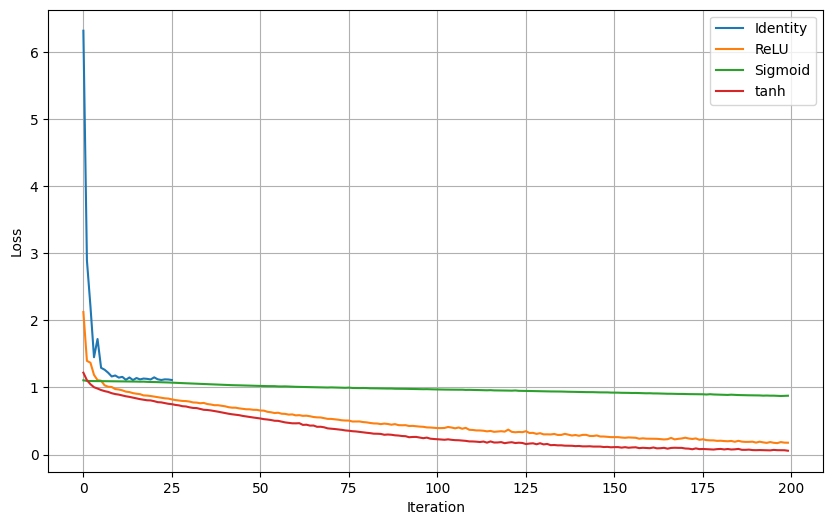

,Trainer Variable Name,Error (MAE)
0,Identity,0.736842
1,ReLU,0.973684
2,Logistic,0.842105
3,tanh,0.842105


In [52]:
"""
Evaluating how each non-linearity activation function handles perturbed input data
"""
# Create the trainer
identity_trainer = IrisMLPTrainer(data, "identity", purturbed=True)
relu_trainer = IrisMLPTrainer(data, "relu", purturbed=True)
logistic_trainer = IrisMLPTrainer(data, "logistic", purturbed=True)
tanh_trainer = IrisMLPTrainer(data, "tanh", purturbed=True)

# Defining the loss arrays
identity_loss = identity_trainer.model.loss_curve_
relu_loss = relu_trainer.model.loss_curve_
logistic_loss = logistic_trainer.model.loss_curve_
tanh_loss = tanh_trainer.model.loss_curve_

# Creating a table of final error results
error_table = ErrorTable([identity_trainer, relu_trainer, logistic_trainer, tanh_trainer],
                         ["Identity", "ReLU", "Logistic", "tanh"]).table

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(identity_loss, label="Identity")
plt.plot(relu_loss, label="ReLU")
plt.plot(logistic_loss, label="Sigmoid")
plt.plot(tanh_loss, label="tanh")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

error_table

/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


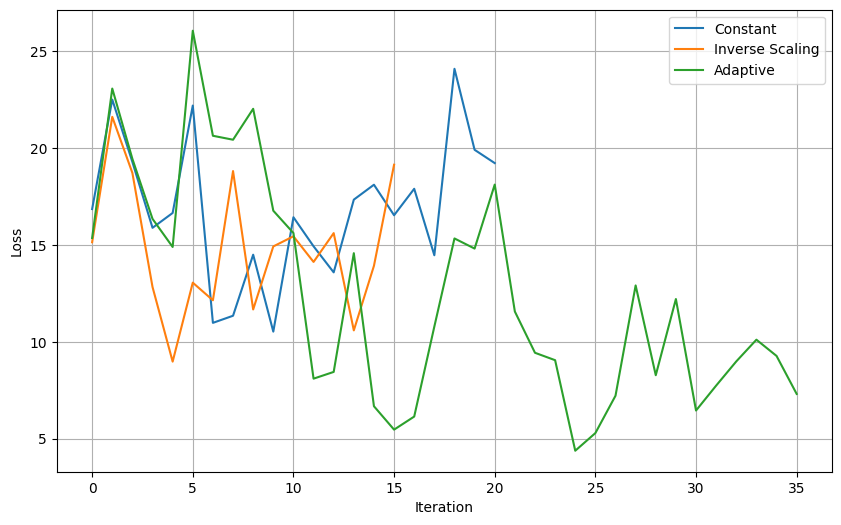

,Trainer Variable Name,Error (MAE)
0,Constant,1.000000
1,Inverse Scaling,1.000000
2,Adaptive,0.973684


In [69]:
"""
Evaluating the effect of different learning rate algorithms. The activation function will be unchanged at ReLU
"""

# Create the trainer
constant_trainer = IrisMLPTrainer(data, "logistic", learning_rate="constant")
invscaling_trainer = IrisMLPTrainer(data, "logistic", learning_rate="invscaling")
adaptive_trainer = IrisMLPTrainer(data, "logistic", learning_rate="adaptive")

# Defining the loss arrays
constant_loss = constant_trainer.model.loss_curve_
invscaling_loss = invscaling_trainer.model.loss_curve_
adaptive_loss = adaptive_trainer.model.loss_curve_

# Creating a table of final error results
error_table = ErrorTable([constant_trainer, invscaling_trainer, adaptive_trainer],
                         ["Constant", "Inverse Scaling", "Adaptive"]).table

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(constant_loss, label="Constant")
plt.plot(invscaling_loss, label="Inverse Scaling")
plt.plot(adaptive_loss, label="Adaptive")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

error_table

/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vidyutveedgav/csds391/HW9EC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


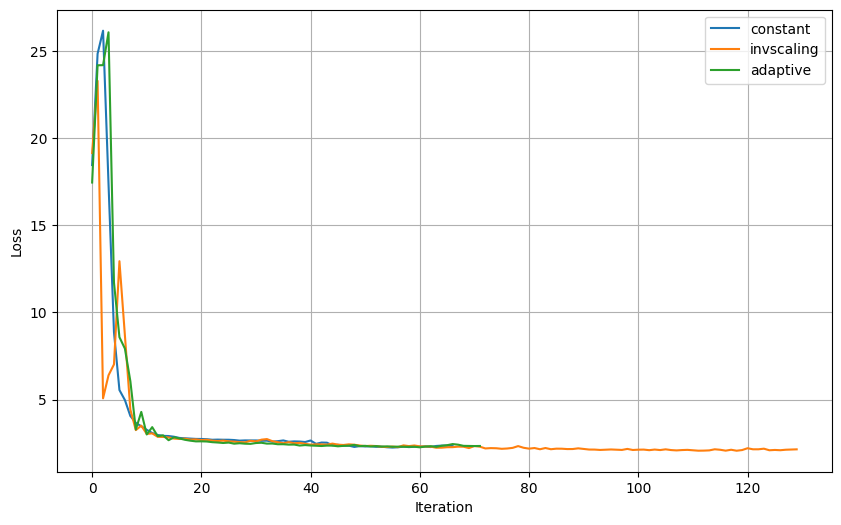

,Trainer Variable Name,Error (MAE)
0,Constant,1.210526
1,Inverse Scaling,0.710526
2,Adaptive,1.236842


In [73]:
"""
Studying how batch sizes can impact learning rate efficiency
"""
# Create the trainer
constant_trainer = IrisMLPTrainer(data, "relu", batch_size=30, learning_rate="constant")
invscaling_trainer = IrisMLPTrainer(data, "relu", batch_size=30, learning_rate="invscaling")
adaptive_trainer = IrisMLPTrainer(data, "relu", batch_size=30, learning_rate="adaptive")

# Defining the loss arrays
constant_loss = constant_trainer.model.loss_curve_
invscaling_loss = invscaling_trainer.model.loss_curve_
adaptive_loss = adaptive_trainer.model.loss_curve_

# Creating a table of final error results
error_table = ErrorTable([constant_trainer, invscaling_trainer, adaptive_trainer],
                         ["Constant", "Inverse Scaling", "Adaptive"]).table

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(constant_loss, label="constant")
plt.plot(invscaling_loss, label="invscaling")
plt.plot(adaptive_loss, label="adaptive")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

error_table